# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Importing Libraries</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import LabelEncoder

# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Loading The Dataset</p>

In [3]:
df = pd.read_csv('/content/heart.csv');
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Exploratory Data Analysis</p>

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Categorical Column Distribution</p>

In [8]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [9]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [10]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [11]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [12]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

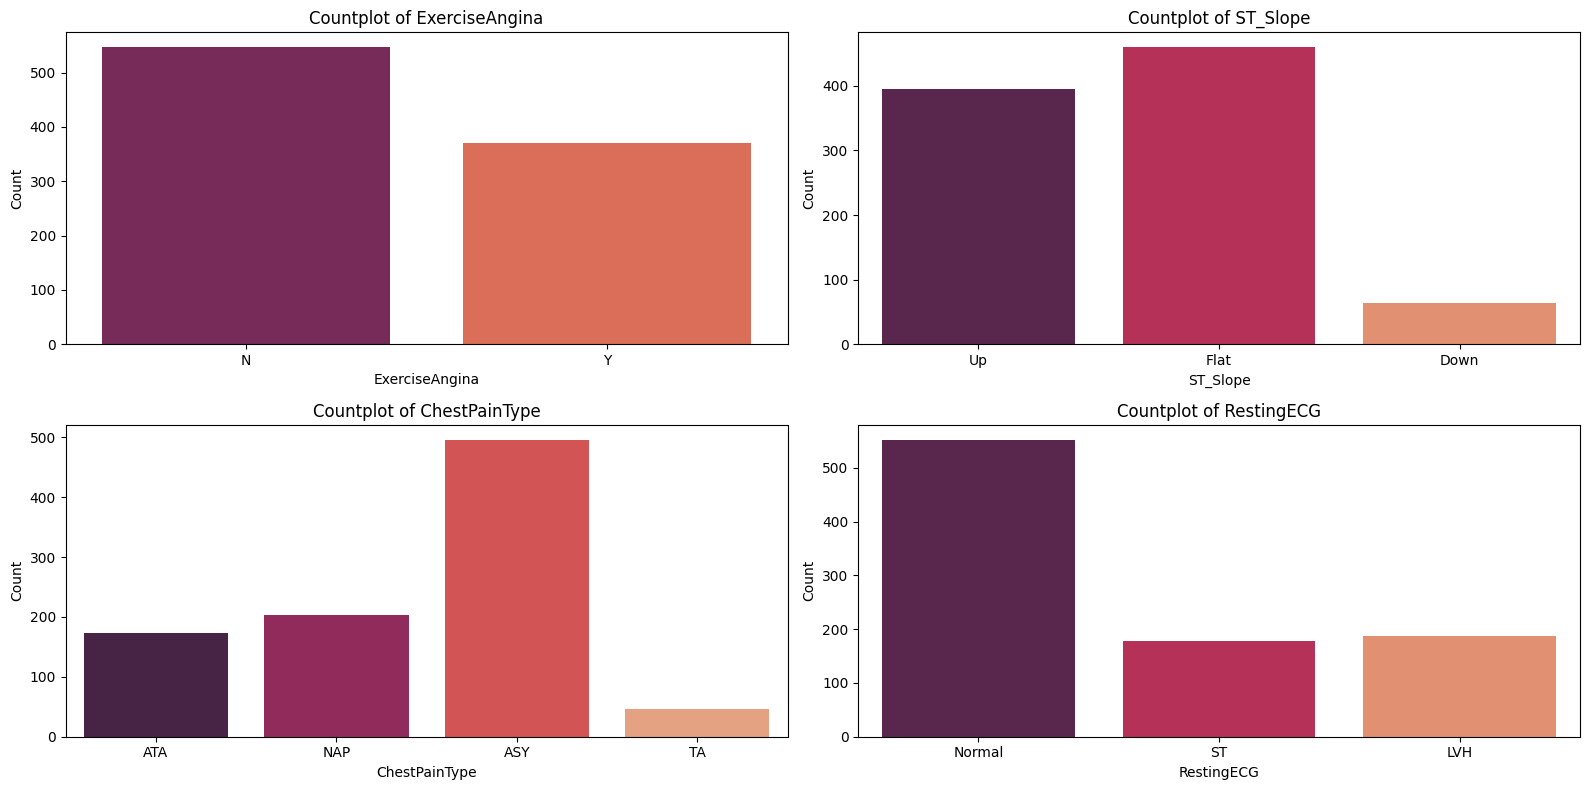

In [13]:
plt.figure(figsize=(16, 8))

# Subplot 1: Countplot for 'ExerciseAngina'
plt.subplot(2, 2, 1)
sns.countplot(x='ExerciseAngina', data=df, palette='rocket')
plt.title('Countplot of ExerciseAngina')
plt.xlabel('ExerciseAngina')
plt.ylabel('Count')

# Subplot 2: Countplot for 'ST_Slope'
plt.subplot(2, 2, 2)
sns.countplot(x='ST_Slope', data=df, palette='rocket')
plt.title('Countplot of ST_Slope')
plt.xlabel('ST_Slope')
plt.ylabel('Count')

# Subplot 3: Countplot for 'ChestPainType'
plt.subplot(2, 2, 3)
sns.countplot(x='ChestPainType', data=df, palette='rocket')
plt.title('Countplot of ChestPainType')
plt.xlabel('ChestPainType')
plt.ylabel('Count')

# Subplot 4: Countplot for 'RestingECG'
plt.subplot(2, 2, 4)
sns.countplot(x='RestingECG', data=df, palette='rocket')
plt.title('Countplot of RestingECG')
plt.xlabel('RestingECG')
plt.ylabel('Count')





plt.tight_layout()
plt.show()


# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Numerical Column Distribution</p>

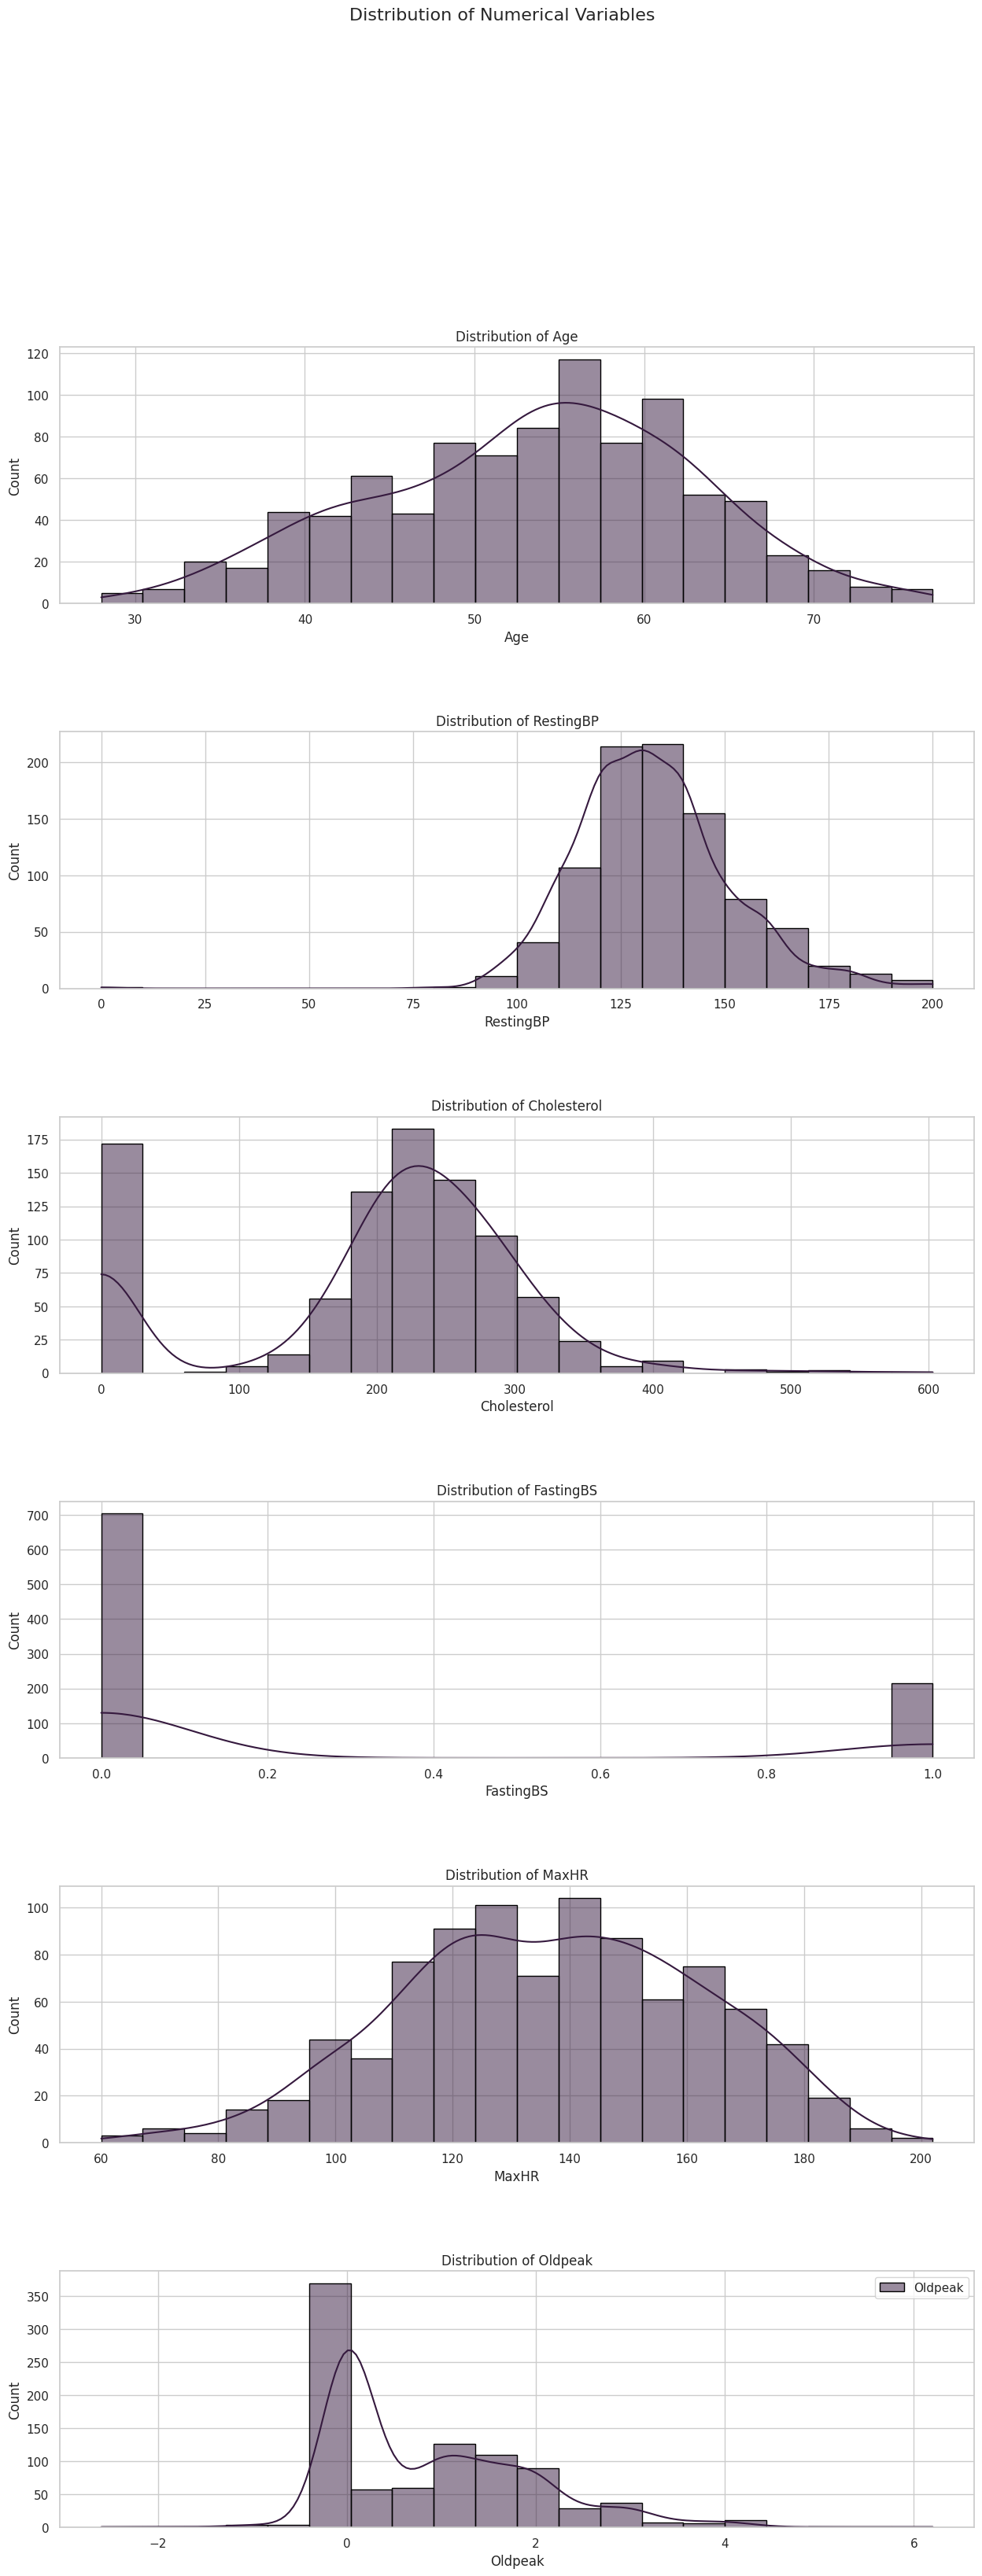

In [14]:

numerical_cols = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

sns.set(style="whitegrid", palette="rocket")


fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(15, 6 * len(numerical_cols)), sharex=False)


for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, ax=axes[i], kde=True, edgecolor='black', label=col)
    axes[i].set_title(f'Distribution of {col}')

# Add legend
axes[-1].legend(loc='upper right')


plt.subplots_adjust(hspace=0.5)

# Overall title
plt.suptitle('Distribution of Numerical Variables', y=1.0, fontsize=16)

plt.show()



# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Label Encoding</p>

In [15]:
labelencoder = LabelEncoder()

df['ChestPainType'] = labelencoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = labelencoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = labelencoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = labelencoder.fit_transform(df['ST_Slope'])
df['Sex'] = labelencoder.fit_transform(df['Sex'])

df.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Correlation Analysis</p>

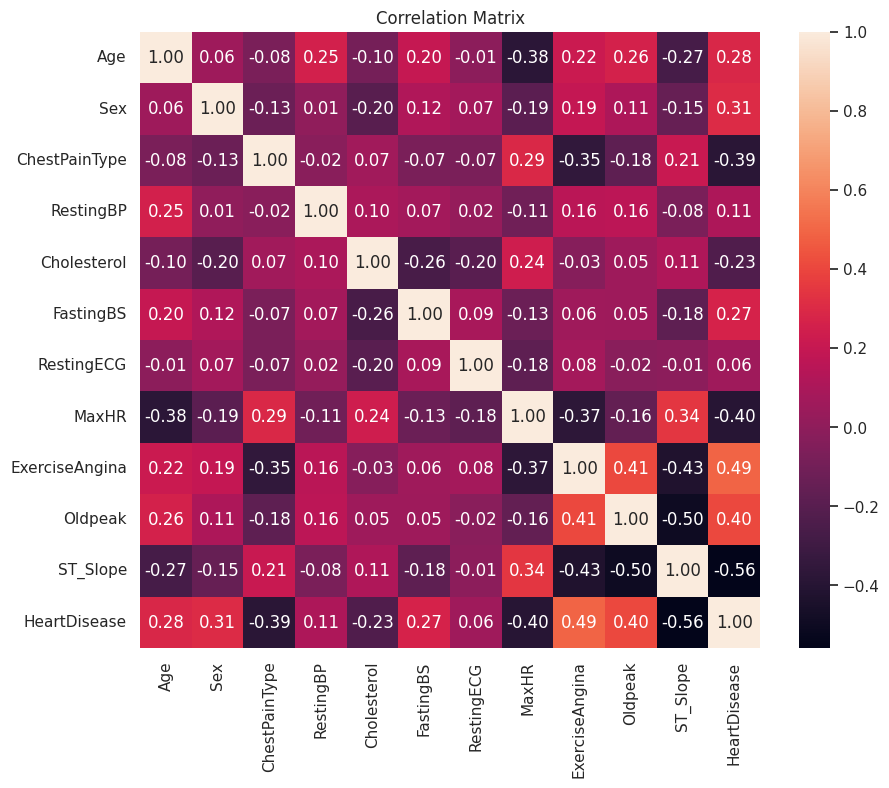

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Data Preparing</p>

In [17]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Train Test Split</p>

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">XGBoost</p>

In [20]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_classification_report = classification_report(y_test, xgb_predictions)

print("\nXGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))


XGBoost Accuracy: 0.8695652173913043
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Random Forest</p>

In [19]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)


# Display results
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.907608695652174
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89        77
           1       0.94      0.90      0.92       107

    accuracy                           0.91       184
   macro avg       0.90      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



# <p style="padding:15px; background-color:#7AA874; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Logistic Regression</p>

In [21]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_classification_report = classification_report(y_test, lr_predictions)

print("\nLogistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", lr_classification_report)


Logistic Regression Accuracy: 0.842391304347826
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        77
           1       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [26]:
y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.59      0.66      0.62        77
           1       0.73      0.66      0.70       107

    accuracy                           0.66       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.67      0.66      0.67       184

Confusion Matrix:
 [[51 26]
 [36 71]]
Training Score:
 78.61035422343325
Mean Squared Error:
 0.33695652173913043
R2 score is:
 -0.3846340575312537


In [27]:
print(accuracy_score(y_test,y_pred)*100)

66.30434782608695


# SVC

In [29]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred=svc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.68      0.69       184

Confusion Matrix:
 [[54 23]
 [35 72]]
Training Score:
 73.433242506812
Mean Squared Error:
 0.31521739130434784
R2 score is:
 -0.29530282801310825


In [30]:
print(accuracy_score(y_test,y_pred)*100)

68.47826086956522


# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [33]:
y_pred=gnb.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

Confusion Matrix:
 [[65 12]
 [17 90]]
Training Score:
 86.37602179836512
Mean Squared Error:
 0.15760869565217392
R2 score is:
 0.3523485859934459


In [34]:
print(accuracy_score(y_test,y_pred)*100)

84.23913043478261


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [36]:
y_pred=dtree.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        77
           1       0.88      0.75      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.81      0.79      0.79       184

Confusion Matrix:
 [[66 11]
 [27 80]]
Training Score:
 91.14441416893733
Mean Squared Error:
 0.20652173913043478
R2 score is:
 0.15135331957761877


In [37]:
print(accuracy_score(y_test,y_pred)*100)

79.34782608695652


# Ensemble [Voting Classifier]

In [40]:
from sklearn.ensemble import VotingClassifier

# Create individual models
logistic = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(probability=True)
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()  # Add XGBoost

# Create a Voting Classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('logistic', logistic),
        ('knn', knn),
        ('svm', svm),
        ('naive_bayes', naive_bayes),
        ('decision_tree', decision_tree),
        ('random_forest', random_forest),
        ('xgboost', xgboost)  # Include XGBoost
    ],
    voting='hard'
)

# Train the Voting Classifier
ensemble_classifier.fit(X_train, y_train)

# Predictions on the testing set
ensemble_predictions = ensemble_classifier.predict(X_test)

# Evaluate the ensemble model
print("Classification Report for Ensemble Classifier:")
print(classification_report(y_test, ensemble_predictions))

# Accuracy score for the ensemble model
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Accuracy for Ensemble Classifier:", accuracy * 100)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Ensemble Classifier:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

Accuracy for Ensemble Classifier: 86.41304347826086


In [45]:
from tabulate import tabulate

# Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('logistic', logistic),
        ('knn', knn),
        ('svm', svm),
        ('naive_bayes', naive_bayes),
        ('decision_tree', decision_tree),
        ('random_forest', random_forest),
        ('xgboost', xgboost)
    ],
    voting='hard'  # Change to 'soft' for weighted voting based on probabilities
)

# List of models including the ensemble
models = [logistic, knn, svm, naive_bayes, decision_tree, random_forest, xgboost, voting_classifier]

# Table header
table_header = ["Model", "Accuracy (%)"]

# Table data
table_data = []

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    table_data.append([model.__class__.__name__, f"{accuracy * 100:.2f}%"])

# Print the table
print(tabulate(table_data, headers=table_header, tablefmt="fancy_grid"))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

╒════════════════════════╤════════════════╕
│ Model                  │ Accuracy (%)   │
╞════════════════════════╪════════════════╡
│ LogisticRegression     │ 84.24%         │
├────────────────────────┼────────────────┤
│ KNeighborsClassifier   │ 70.11%         │
├────────────────────────┼────────────────┤
│ SVC                    │ 68.48%         │
├────────────────────────┼────────────────┤
│ GaussianNB             │ 84.24%         │
├────────────────────────┼────────────────┤
│ DecisionTreeClassifier │ 78.80%         │
├────────────────────────┼────────────────┤
│ RandomForestClassifier │ 88.59%         │
├────────────────────────┼────────────────┤
│ XGBClassifier          │ 86.96%         │
├────────────────────────┼────────────────┤
│ VotingClassifier       │ 86.41%         │
╘════════════════════════╧════════════════╛


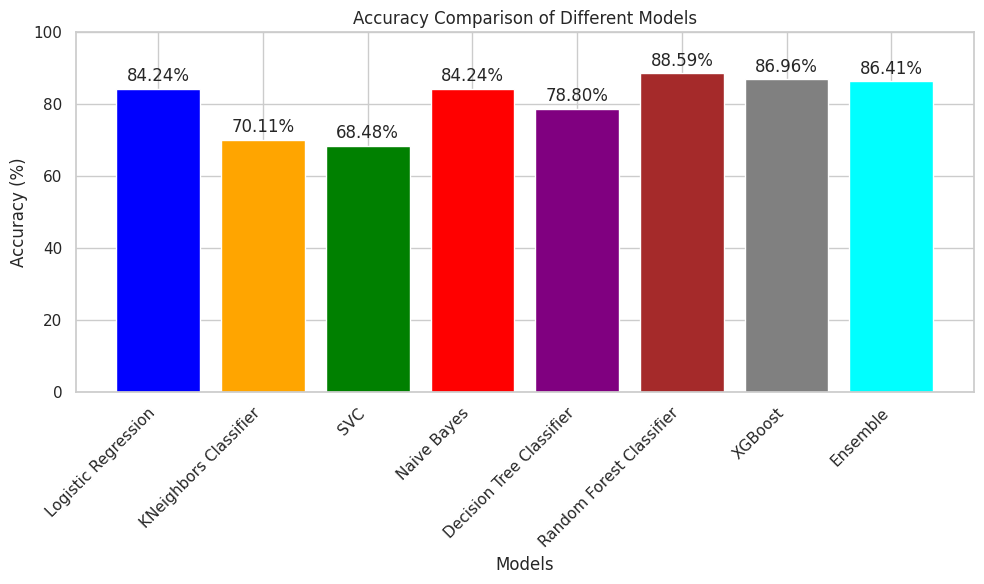

In [46]:
import matplotlib.pyplot as plt

# List of models
models = ['Logistic Regression', 'KNeighbors Classifier', 'SVC', 'Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGBoost', 'Ensemble']

# Corresponding accuracy values (update as needed)
accuracy_values = [84.24, 70.11, 68.48, 84.24, 78.80, 88.59, 86.96, 86.41]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'gray', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100 for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the accuracy values on top of the bars
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()
